In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from robustcontrol import utils
from robustcontrol import utilsplot

# Zeros and poles


In [11]:

s = utils.tf([1, 0])
τ = 100

def Gs(α):
    return (1/((τ*s + 1)*(τ*s + 1 + 2*α)))*utils.mimotf([[τ*s + 1 + α, α],
                                                         [α, τ*s + 1 + α]])


z2 = [round(zi, 3) for zi in utils.zeros(Gs(2))]
p2 = [round(pi, 3) for pi in utils.poles(Gs(2))]

z20 = [round(zi, 3) for zi in utils.zeros(Gs(20))]
p20 = [round(pi, 3) for pi in utils.poles(Gs(20))]

print('Zeros for α = 2 are:', z2)
print('Poles for α = 2 are:', p2)

print('Zeros for α = 20 are:', z20)
print('Poles for α = 20 are:', p20)

Zeros for α = 2 are: []
Poles for α = 2 are: [-0.05, -0.01]
Zeros for α = 20 are: []
Poles for α = 20 are: [-0.41, -0.01]


# RGA and singular values

In [69]:
w = np.logspace(-3, 1, 1000)
s = 1j*w


def G(s):
    return (1/((τ*s + 1)*(τ*s + 1 + 2*α)))*np.matrix([[τ*s + 1 + α, α],
                                                      [α, τ*s + 1 + α]])

def g11(s):
    return (τ*s + 1 + α)/((τ*s + 1)*(τ*s + 1 + 2*α))
def g12(s):
    return α/((τ*s + 1)*(τ*s + 1 + 2*α))

g22 = g11
g21 = g12

def λ_11(s):
    return 1/(1 - ((g12(s)*g21(s))/(g11(s)*g22(s))))


In [70]:
α = 2
Gjw2 = map(G, s)
σ2 = np.array([Σ for U, Σ, V in map(np.linalg.svd, Gjw2)])

λ11_2 = np.array([λ_11(i) for i in s])
λ21_2 = 1 - λ11_2

α = 20
Gjw20 = map(G, s)
σ20 = np.array([Σ for U, Σ, V in map(np.linalg.svd, Gjw20)])

λ11_20 = np.array([λ_11(i) for i in s])
λ21_20 = 1 - λ11_20


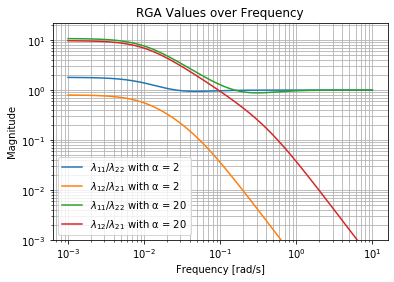

In [71]:
plt.figure(1)
plt.title('RGA Values over Frequency')
plt.xlabel(r'Frequency [rad/s]')
plt.ylabel(r'Magnitude')
plt.loglog(w, abs(λ11_2), label='$\lambda_{11}/\lambda_{22}$ with α = 2')
plt.loglog(w, abs(λ21_2), label='$\lambda_{12}/\lambda_{21}$ with α = 2')
plt.loglog(w, abs(λ11_20), label='$\lambda_{11}/\lambda_{22}$ with α = 20')
plt.loglog(w, abs(λ21_20), label='$\lambda_{12}/\lambda_{21}$ with α = 20')
plt.grid(b=None, which='both', axis='both')
plt.ylim(10**-3)
plt.legend(loc=3)

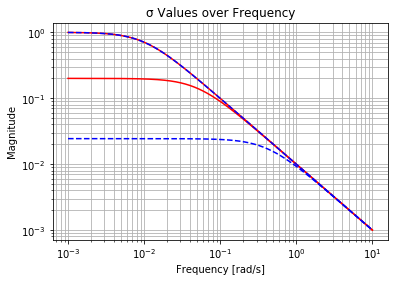

In [72]:
plt.figure(2)
plt.title('σ Values over Frequency')
plt.xlabel(r'Frequency [rad/s]')
plt.ylabel(r'Magnitude')
plt.loglog(w, σ2, label='α = 2', color='red', linestyle='-')
plt.loglog(w, σ20, label='α = 20', color='blue', linestyle='--')
plt.grid(b=None, which='both', axis='both')
plt.show()

 It is shown in the figure that for alpha =  2, peak is less than 2, for alpha peak is just over 10. The singular values of the system are shown in Fig. 2. It
is shown that the sv is 1 or less at all frequencies. Thus it is difficult to control this plant. Plant wih alpha = 2 is easier to control with lower RGA values at lower frequencies.

In [82]:
max(σ2[:,0]), max(σ2[:, 1]), max(σ20[:,0]), max(σ20[:,1])

(0.9950371902099892,
 0.19996001199600144,
 0.9950371902099892,
 0.024390171355933778)